# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# LOAD THE DATASET

In [ ]:
df=pd.read_csv('/content/mobile_price_classification.csv')
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


COLUMNS

In [ ]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

SHAPE

In [ ]:
df.shape

(2000, 21)

MISSING VALUES

In [ ]:
df.isnull().sum()

,0
battery_power,0
bluetooth,0
clock_speed,0
dual_sim,0
front_cam,0
4G,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


BASIC INFORMATIONS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

DATA SPLITTING(PRICE_RANGE IS THE TARGET COLUMN)

In [ ]:
# split the data s features and labels
x, y = df.values[:,:-1], df.values[:,-1]

# ensure all data are floating point values
x = x.astype('float32')

TRAINING AND TEST SPLIT

In [ ]:
#split into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1340, 20) (660, 20) (1340,) (660,)


STANDARDISATION

In [ ]:
# Standardize the feature values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# determine the number of features
n_features = x_train.shape[1]

In [ ]:
n_features

20

IDENTIFYING TARGET LABELS

In [ ]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


here 4 output labels and 20 inputs

# DEFINE THE NEURAL NETWORK MODEL
-SEQUENTIAL MODEL WITH 3 HIDDEN LAYERS
-ACTIVATION FUNCTION FOR HIDDEN LAYERS IS RELU


-ACTIVATION FUNCTION FOR OUT PUT LAYER IS SOFTMAX SINCE THIS IS A MULTICLASS CLASSIFICATION PROBLEM.


-INPUT SHAPE IS NO OF INPUTS ,HERE 20 INPUTS

In [ ]:
#define the model
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(n_features,)))#hidden layer 1
model.add(Dense(64,activation='relu'))#hidden layer 2
model.add(Dense(32,activation='relu'))#hidden layer 3
model.add(Dense(4,activation='softmax'))#output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# COMPILE THE MODEL

OPTIMIZER USED IS ADAM

SPARSE CATEGORICAL ENTROPY AND ACCURACY  IS USED AS EVALUATION METRICS

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# MODEL TRAINING

In [ ]:

# fit the model
history=model.fit(x_train,y_train,epochs =200, validation_split=0.2,batch_size =32,verbose=0)


# MODEL EVALUATION

In [ ]:
#evaluate
loss,acc = model.evaluate(x_test,y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.6919 


In [ ]:
x_test[6]

array([-1.576493  ,  1.0014936 ,  0.11781786, -1.0333931 , -0.9918377 ,
       -1.045825  , -0.45730588,  0.01038058, -0.4140888 , -0.6593397 ,
       -1.6287729 ,  1.1213661 ,  0.18677181, -0.732831  , -0.06072284,
        0.5293427 , -1.4560769 ,  0.56930715, -1.0044876 ,  0.99553233],
      dtype=float32)

In [ ]:
ypr=model.predict(x_test[[20]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
ypr

array([[0.0000000e+00, 1.8424556e-30, 2.2463769e-11, 1.0000000e+00]],
      dtype=float32)

In [ ]:
y_test[20]

np.float64(3.0)

TESTING THE MODEL WITH A RANDOM SAMPLE

In [ ]:

predicted_class = ypr.argmax(axis=1)[0]
true_class = y_test[20]

print(f"Predicted class: {predicted_class}")
print(f"True class: {true_class}")

if predicted_class != true_class:
    print("The model misclassified this sample.")
else:
    print("The model classified this sample correctly.")


Predicted class: 3
True class: 3.0
The model classified this sample correctly.


MODEL SUMMARY

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,470 (154.18 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,314 (102.79 KB)

ACCURACY AND LOSS PLOT FOR TRAINING AND VALIDATION SET

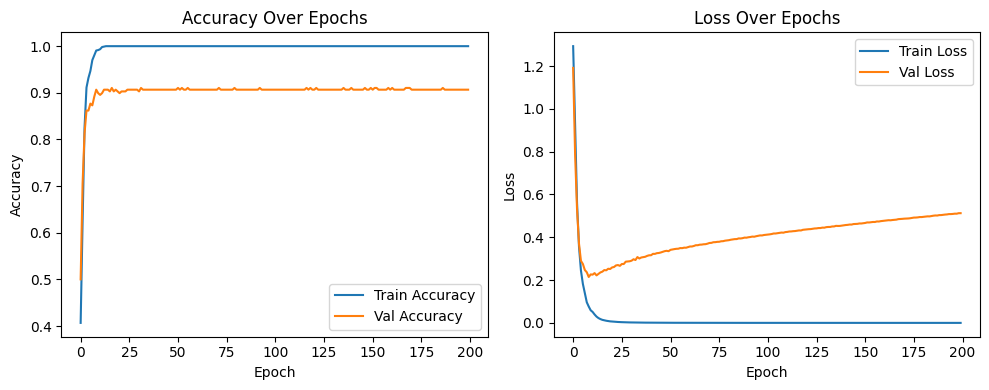

In [ ]:
#  Plot Training Progress


plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


TRAIN ACCURACY AND VALIDATION ACCURACY ARE HIGH BUT TEST ACCURACY IS LESS WHICH INDICATES OVERFITTING.

# HYPERPARAMETER TUNING

MANUAL TUNING

We'll train 4 models with different learning rates:

| Model | Learning Rate |
| ----- | ------------- |
| A     | 0.0001        |
| B     | 0.001         |
| C     | 0.01          |
| D     | 0.1           |

For all:

Epochs = 200

Batch Size = 32

Optimizer = Adam

Architecture =  ReLU + Softmax

In [ ]:
from tensorflow.keras.optimizers import Adam

# Function to build and train model
def train_model_with_lr(learning_rate):
    #define the model
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(n_features,)))#hidden layer 1
    model.add(Dense(64,activation='relu'))#hidden layer 2
    model.add(Dense(32,activation='relu'))#hidden layer 3
    model.add(Dense(4,activation='softmax'))#output layer

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0)
    return history

# Try different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
histories = {}

for lr in learning_rates:
    histories[lr] = train_model_with_lr(lr)


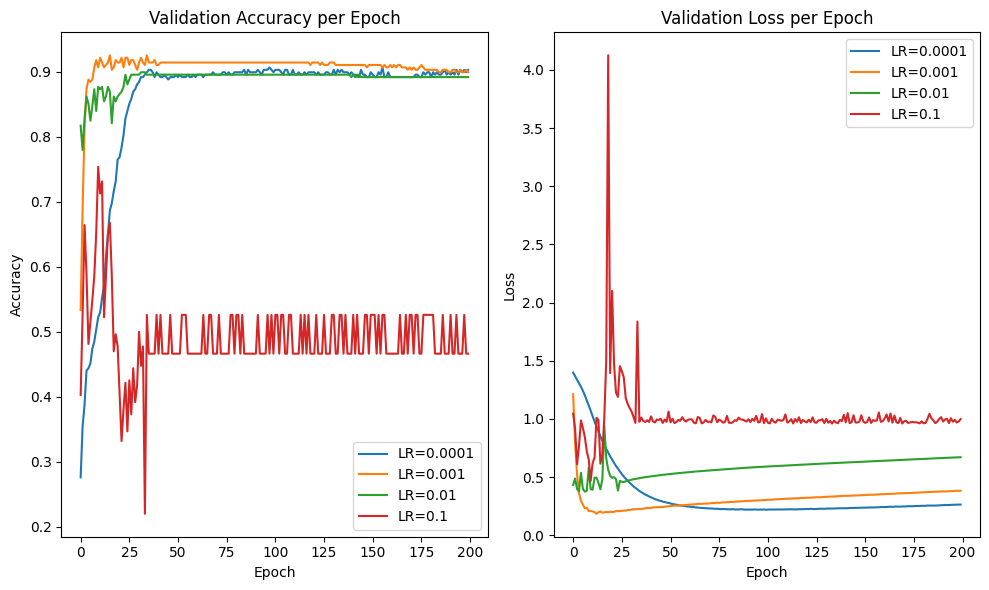

In [ ]:
# Plot validation accuracy and loss
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(histories[lr].history['val_accuracy'], label=f'LR={lr}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.plot(histories[lr].history['val_loss'], label=f'LR={lr}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


lr=.001 is the best learning rate

TUNING BATCH SIZE

In [ ]:
# Function to train with different batch sizes
def train_model_with_batch(batch_size):
    #define the model
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(n_features,)))#hidden layer 1
    model.add(Dense(64,activation='relu'))#hidden layer 2
    model.add(Dense(32,activation='relu'))#hidden layer 3
    model.add(Dense(4,activation='softmax'))#output layer

    optimizer = Adam(learning_rate=0.001)  # Best learning rate from previous tuning
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=batch_size, verbose=0)
    return history

# Try batch sizes: 4, 8, 16, 32
batch_sizes = [16, 32,64,128]
histories = {}

for batch in batch_sizes:
    histories[batch] = train_model_with_batch(batch)

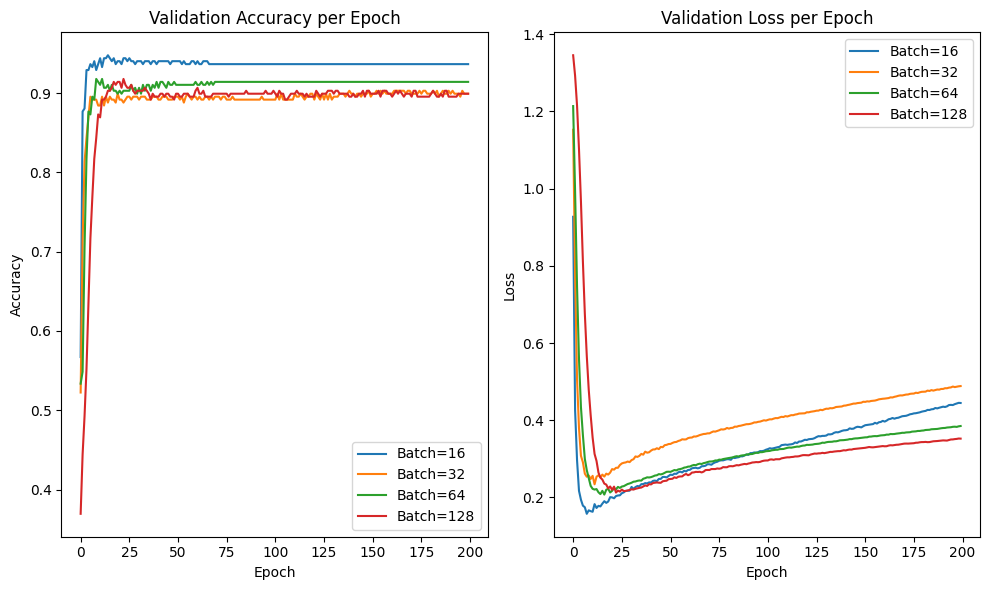

In [ ]:

# Plot the results
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
for batch in batch_sizes:
    plt.plot(histories[batch].history['val_accuracy'], label=f'Batch={batch}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
for batch in batch_sizes:
    plt.plot(histories[batch].history['val_loss'], label=f'Batch={batch}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Batch =64 and 128 performs good ..

TUNE FOR NO OF EPOCHS

In [ ]:
# Train model with a given number of epochs
def train_model_with_epochs(num_epochs):
     #define the model
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(n_features,)))#hidden layer 1
    model.add(Dense(64,activation='relu'))#hidden layer 2
    model.add(Dense(32,activation='relu'))#hidden layer 3
    model.add(Dense(4,activation='softmax'))#output layer

    optimizer = Adam(learning_rate=0.001)#best lr
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_split=0.2, epochs=num_epochs, batch_size=64, verbose=0)#best batch size
    return history

# Test different epoch values
epoch_values =[20, 30, 40, 50, 60, 75, 100]

histories = {}

for num_epochs in epoch_values:
    histories[num_epochs] = train_model_with_epochs(num_epochs)


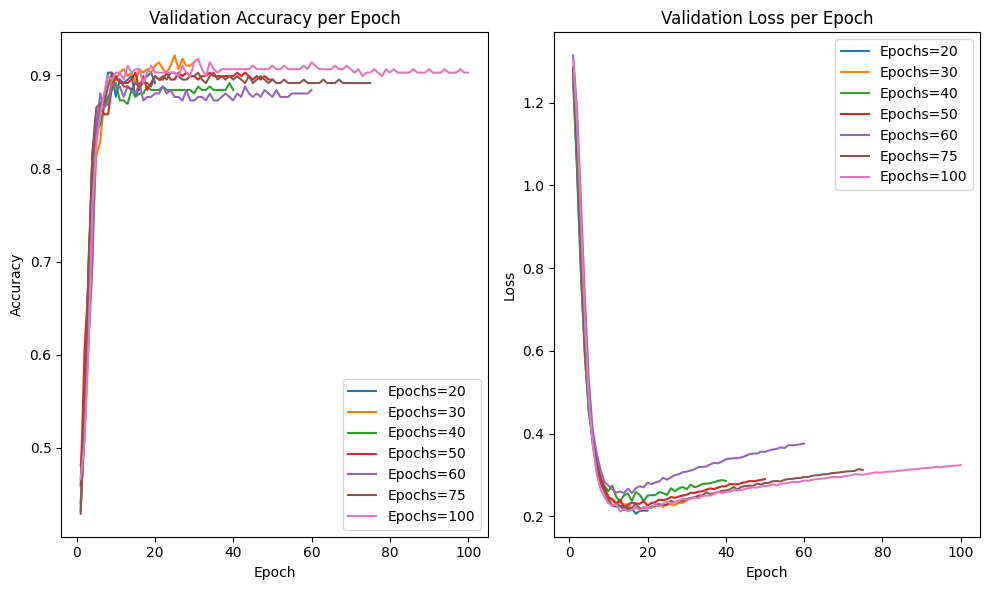

In [ ]:

# Plotting validation accuracy and loss
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
for num_epochs in epoch_values:
    val_acc = histories[num_epochs].history['val_accuracy']
    plt.plot(range(1, len(val_acc)+1), val_acc, label=f'Epochs={num_epochs}')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
for num_epochs in epoch_values:
    val_loss = histories[num_epochs].history['val_loss']
    plt.plot(range(1, len(val_loss)+1), val_loss, label=f'Epochs={num_epochs}')
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

epoch=40 is the best.
So the best parameters are
epoch=40
batch_size=64
lr=0.001

# OPTIMIZER TUNING

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Train model with a given optimizer
def train_model_with_optimizer(optimizer):
   #define the model
    model=Sequential()
    model.add(Dense(128,activation='relu',input_shape=(n_features,)))#hidden layer 1
    model.add(Dense(64,activation='relu'))#hidden layer 2
    model.add(Dense(32,activation='relu'))#hidden layer 3
    model.add(Dense(4,activation='softmax'))#output layer

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=64, verbose=0)#best batch size
    return history

# Try different optimizers
optimizers = {
    "Adam": Adam(learning_rate=0.001),
    "SGD": SGD(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.001)
}

histories = {name: train_model_with_optimizer(opt) for name, opt in optimizers.items()}




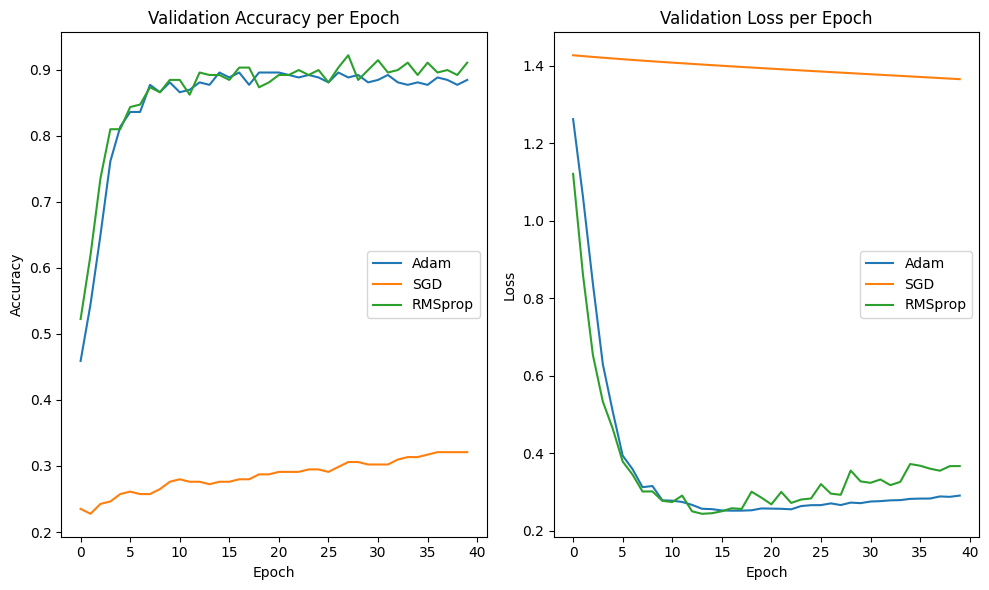

In [ ]:

# Plot results
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
for name in histories:
    plt.plot(histories[name].history['val_accuracy'], label=name)
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
for name in histories:
    plt.plot(histories[name].history['val_loss'], label=name)
plt.title('Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# MODEL WITH TUNED HYPERPARAMETERS

In [ ]:
#with tuned parameters
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(n_features,)))#hidden layer 1
model.add(Dense(64,activation='relu'))#hidden layer 2
model.add(Dense(32,activation='relu'))#hidden layer 3
model.add(Dense(4,activation='softmax'))#output layer
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=64, verbose=0)#best batch size

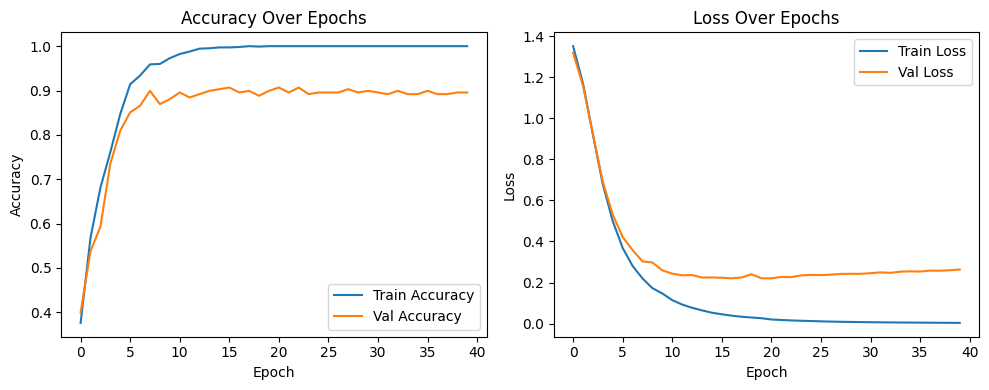

In [ ]:
# Step 6: Plot Training Progress


plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#evaluate TEST ACCURACY
loss,acc = model.evaluate(x_test,y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.3016 


In [ ]:
loss,acc=model.evaluate(x_train,y_train)#TRAIN ACCURACY

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9971 - loss: 0.0103 


ON TRAINING DATA I GOT BETTER ACCURACY BUT TEST ACCURACY IS LESS,WHICH INDICATES OVERFITTING

 USE FOLLOWING TECHNIQUE TO REDUCE OVERFITTING

*   1. Add Dropout Layers
Dropout randomly disables neurons during training, helping prevent the model from relying too much on specific features.
*   2. Use EarlyStopping
To stop training when validation performance stops improving



In [ ]:
#ADD DROPOUT LAYERS
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.3))  # added
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # added
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [ ]:
#ADD EARLY STOPPING
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,  # Try higher, early_stop will stop it early
    batch_size=64,
    callbacks=[early_stop],
    verbose=0
)


In [ ]:
#evaluate
loss,acc = model.evaluate(x_test,y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9002 - loss: 0.2438 


In [ ]:
loss,acc=model.evaluate(x_train,y_train)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9960 - loss: 0.0509 


AFTER HYPERPARAMETER TUNING,DROPOUT AND EARLY STOPPING I GOT BETTER ACCURACY ON BOTH TEST DATA AND TRAINING DATA.